This program produces 3 plots: precision, recall, and fscore for the LOF algorithm. The X-axis represents the value k, which is the parameter for the number of nearest neighbors. The Y-axis represents the scores for the three metrics. 

In [1]:
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http')
import numpy as np
X = kdd99_data['data']
y = kdd99_data['target']
y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
    #print('K value: ', n)
    lof = LocalOutlierFactor(n_neighbors = n)
    anomaly_predictions = lof.fit_predict(X)
    
  
    anomaly_predictions = np.array(anomaly_predictions)
    r = recall_score(y, anomaly_predictions, pos_label = -1)
    p = precision_score(y, anomaly_predictions, pos_label = -1)
    f = f1_score(y, anomaly_predictions, pos_label = -1)
    
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [3]:
ilist = []
i = 1
while i<5:
    calculations(i)
    ilist.append(i)
    i=i+1
    
i = 5
while i <= 160:
   calculations(i)
   ilist.append(i)
   i = i*2


In [4]:
#recall_score
print('Values of K: ', ilist)

Values of K:  [1, 2, 3, 4, 5, 10, 20, 40, 80, 160]


In [5]:
print('Recall Scores: ', recall_scores)
print('\n\nPrecision Scores: ', precision_scores)
print('\n\nF1 Scores: ', f1_scores)

Recall Scores:  [0.010864644635581712, 0.015844273426889995, 0.013580805794477138, 0.012675418741511997, 0.012675418741511997, 0.01765504753282028, 0.028519692168401993, 0.04843820733363513, 0.05251244907197827, 0.05296514259846084]


Precision Scores:  [0.002041510717931269, 0.003724196637582464, 0.004227733934611048, 0.005074302283436027, 0.00608695652173913, 0.018606870229007633, 0.06687898089171974, 0.12369942196531791, 0.10469314079422383, 0.09337589784517158]


F1 Scores:  [0.0034371643394199777, 0.006030843456534849, 0.006448146157979581, 0.0072473146111039196, 0.008224408870612425, 0.018118466898954706, 0.039987305617264365, 0.06961613532856213, 0.069942719324691, 0.06759098786828423]


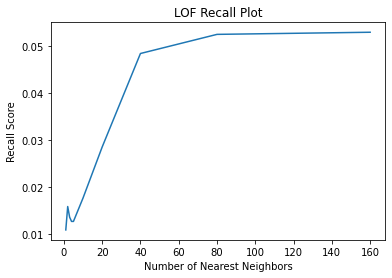

In [6]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Recall Score')
plt.title('LOF Recall Plot')
plt.show()

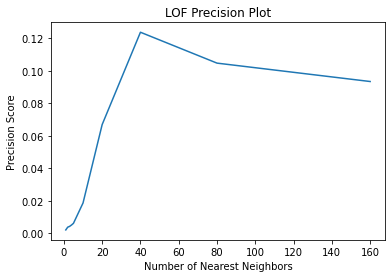

In [7]:
import matplotlib.pyplot as plt
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Precision Score')
plt.title('LOF Precision Plot')
plt.show()

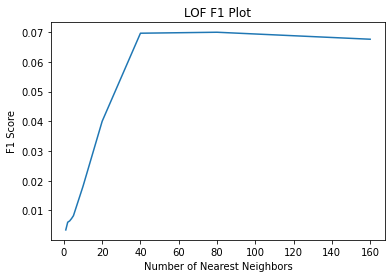

In [8]:
import matplotlib.pyplot as plt
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('F1 Score')
plt.title('LOF F1 Plot')
plt.show()

By looking at all three graphs, it can be seen that the optimal value of K is about 40. Although increasing this parameter would result in more of the anomalies being detected, there would be a consequence of higher false alarm rates. The harmonic mean of precision and recall also seems to level out and decrease after 40. 

In [9]:
lof = LocalOutlierFactor(n_neighbors = 40)
anomaly_predictions = lof.fit_predict(X)
    
  
anomaly_predictions = np.array(anomaly_predictions)
r = recall_score(y, anomaly_predictions, pos_label = -1)
p = precision_score(y, anomaly_predictions, pos_label = -1)
f = f1_score(y, anomaly_predictions, pos_label = -1)
    
print('Value of K: 40', '\nRecall Score: ', r, '\nPrecision Score: ', p, '\nF1 Score: ', f )

Value of K: 40 
Recall Score:  0.04843820733363513 
Precision Score:  0.12369942196531791 
F1 Score:  0.06961613532856213


Even by optimizing the value of K, the calculations show that LOF is not an effective algorithm to use on this dataset (or at least the http subset) because only 4.8% of the anomalies were located. Additionally, only 12.4% of the anomalies were correctly identified. Thus, the accuracy is exceptionally low at about 7%. 

-------------------------------------------------------------------------------------------------------------------------------

Now that we know the optimal value for n_neighbors, let's see if we can improve results by using feature selection. 